In [45]:
import os
import pandas as pd
import seaborn as sb
sb.set_style('darkgrid')

# read data from web

base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"
confirmed_url = os.path.join(base_url, "time_series_19-covid-Confirmed.csv")
c = pd.read_csv(confirmed_url, index_col=1)


In [46]:
c = c.drop(labels=["Lat", "Long", "Province/State"], axis=1)

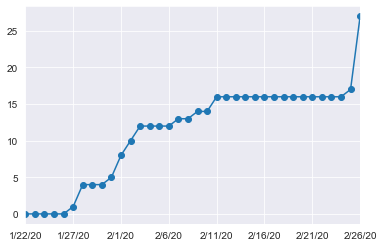

In [47]:
c.loc['Germany'].plot(kind='line', style='o-')